In [1]:
import bikes_data

bikes = bikes_data.data_prerocessing()
bikes.head(3)

NameError: name 'null' is not defined

### 1. 대여구별 이용건수

In [2]:
bikes.columns

Index(['자전거번호', '대여일시', '대여 대여소번호', '대여 대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간', '이용거리', '요일', '일자', '대여시간대', '주말구분', '대여구',
       '대여점 위도', '대여점 경도'],
      dtype='object')

In [10]:
구별이용건수 = bikes.pivot_table(index='대여구', values='자전거번호', aggfunc='count')\
                .sort_values(by='자전거번호', ascending=True).reset_index()
                
구별이용건수.head(10)

,대여구,자전거번호
0,금천구,33650
1,도봉구,37810
2,중구,38733
3,강북구,38901
4,용산구,47993
5,중랑구,53107
6,동작구,54393
7,은평구,58874
8,서대문구,60415
9,양천구,64912


<Axes: title={'center': '대여구별 이용건수'}>

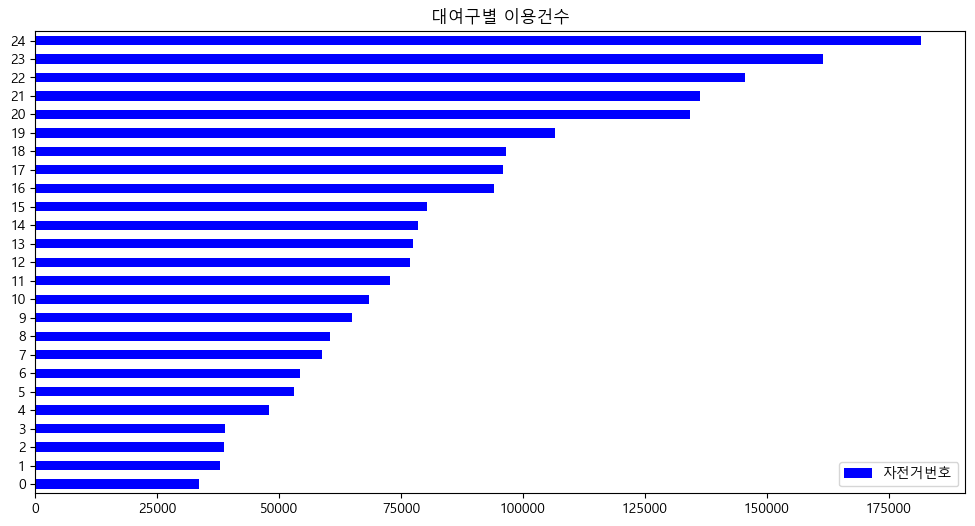

In [14]:
구별이용건수.plot(kind='barh', title='대여구별 이용건수', figsize=(12, 6), color='b')

In [15]:
import json 
import folium

with open('../data/Seoul_Gu.json', 'r') as f:
    seoul_data = json.load(f)

In [26]:
seoul_data['features'][0]['properties']

{'SIG_CD': '11110', 'SIG_ENG_NM': 'Jongno-gu', 'SIG_KOR_NM': '종로구'}

In [24]:
map1 = folium.Map(location=[bikes['대여점 위도'].mean(),  bikes['대여점 경도'].mean()],
        zoom_start=11)

In [32]:
folium.Choropleth(
    geo_data=seoul_data,
    data= 구별이용건수,
    columns= ['대여구', '자전거번호'],
    fill_color='YlGnBu',
    key_on='feature.properties.SIG_KOR_NM').add_to(map1)
map1

# 2. 대여구별 이용시간 평균

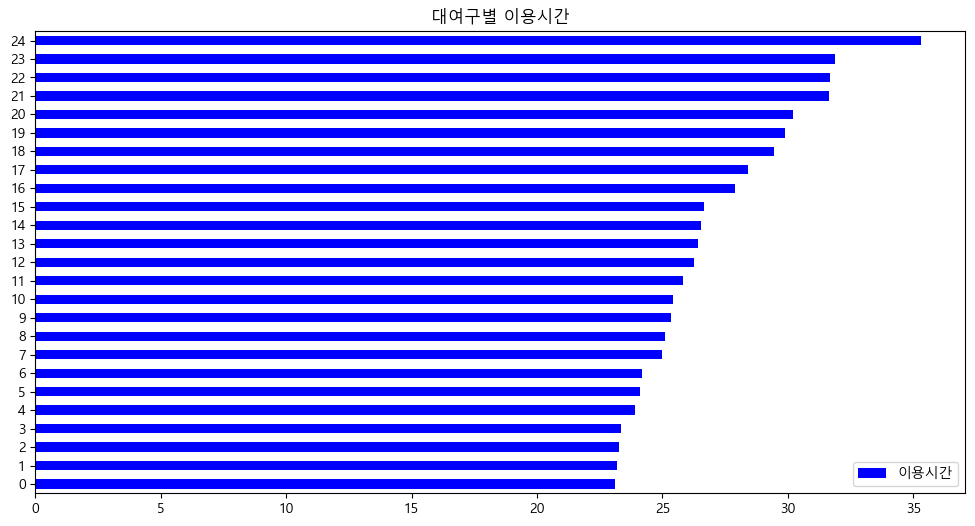

In [33]:
구별이용시간 = bikes.pivot_table(index='대여구', values='이용시간', aggfunc='mean')\
                .sort_values(by='이용시간', ascending=True).reset_index()
                
구별이용시간.head(10)
구별이용시간.plot(kind='barh', title='대여구별 이용시간', figsize=(12, 6), color='b')

map2 = folium.Map(location=[bikes['대여점 위도'].mean(),  bikes['대여점 경도'].mean()],
        zoom_start=11)
folium.Choropleth(
    geo_data=seoul_data,
    data= 구별이용시간,
    columns= ['대여구', '이용시간'],
    fill_color='YlGnBu',
    key_on='feature.properties.SIG_KOR_NM').add_to(map2)
map2